In [ ]:
#!pip install librosa --upgrade


In [ ]:
import pandas as pd
import numpy as np
import os
import sys

import librosa

import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio
from google.colab import drive

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
##variables
emociones = []

In [ ]:
drive.mount('/content/drive')
Ravdess = '/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24/'
Crema = '/content/drive/MyDrive/Crema/AudioWAV'
Tess = '/content/drive/MyDrive/Tess/TESS_Toronto_emotional_speech_set_data/TESS_Toronto_emotional_speech_set_data/'
Savee = '/content/drive/MyDrive/Savee/ALL'

directorios = os.listdir(Ravdess)
os.listdir(Ravdess)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Actor_20',
 'Actor_22',
 'Actor_24',
 'Actor_23',
 'Actor_21',
 'Actor_14',
 'Actor_12',
 'Actor_11',
 'Actor_15',
 'Actor_17',
 'Actor_19',
 'Actor_18',
 'Actor_10',
 'Actor_13',
 'Actor_16',
 'Actor_03',
 'Actor_05',
 'Actor_04',
 'Actor_09',
 'Actor_02',
 'Actor_01',
 'Actor_08',
 'Actor_07',
 'Actor_06']

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

<ipython-input-47-9455e7d8fd7d>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


Emotions                                               Path
0     calm  /content/drive/MyDrive/Ravdess/audio_speech_ac...
1  neutral  /content/drive/MyDrive/Ravdess/audio_speech_ac...
2     calm  /content/drive/MyDrive/Ravdess/audio_speech_ac...
3  neutral  /content/drive/MyDrive/Ravdess/audio_speech_ac...
4     calm  /content/drive/MyDrive/Ravdess/audio_speech_ac...

# **Identificadores de nombre de archivo:**

1. **Modalidad**: (01 = AV completo, 02 = solo video, 03 = solo audio).
   - Este identificador especifica el tipo de contenido en el archivo.
   - "AV completo" significa que el archivo incluye tanto video como audio, "solo video" solo tiene video, y "solo audio" solo tiene la pista de audio.

2. **Canal vocal**: (01 = habla, 02 = canción).
   - Este identificador indica si el canal vocal es de una persona hablando o cantando.

3. **Emoción**: (01 = neutro, 02 = tranquilo, 03 = feliz, 04 = triste, 05 = enojado, 06 = temeroso, 07 = disgusto, 08 = sorprendido).
   - Este identificador se refiere a la emoción expresada en el archivo.
   - Cada número representa una emoción específica, como neutro, tranquilo, feliz, etc.

4. **Intensidad emocional**: (01 = normal, 02 = fuerte).
   - Indica la intensidad de la emoción expresada.
   - La emoción "neutra" no tiene intensidad fuerte, solo tiene intensidad normal.

5. **Enunciado**: (01 = "Los niños están hablando junto a la puerta", 02 = "Los perros están sentados junto a la puerta").
   - Este identificador se refiere al enunciado específico que se está pronunciando en el archivo de audio o video.

6. **Repetición**: (01 = 1ª repetición, 02 = 2ª repetición).
   - Este identificador indica la repetición del enunciado. Si el enunciado se repite más de una vez, se marca con el número correspondiente.

7. **Actor**: (01 al 24. Los actores impares son hombres, los actores pares son mujeres).
   - Este identificador asigna un número a cada actor.
   - Los actores impares son hombres y los actores pares son mujeres, con números del 01 al 24.

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []
print(crema_directory_list)
for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

['1079_TSI_SAD_XX.wav', '1079_TSI_HAP_XX.wav', '1079_TSI_FEA_XX.wav', '1080_DFA_ANG_XX.wav', '1079_TIE_NEU_XX.wav', '1079_TSI_DIS_XX.wav', '1079_WSI_ANG_XX.wav', '1079_WSI_NEU_XX.wav', '1079_TIE_ANG_XX.wav', '1079_WSI_HAP_XX.wav', '1079_TSI_ANG_XX.wav', '1079_WSI_SAD_XX.wav', '1079_TIE_SAD_XX.wav', '1079_TIE_FEA_XX.wav', '1079_WSI_FEA_XX.wav', '1079_WSI_DIS_XX.wav', '1079_TSI_NEU_XX.wav', '1080_IEO_ANG_HI.wav', '1080_IEO_DIS_LO.wav', '1080_DFA_HAP_XX.wav', '1080_IEO_FEA_HI.wav', '1080_DFA_DIS_XX.wav', '1080_IEO_SAD_LO.wav', '1080_DFA_NEU_XX.wav', '1080_DFA_SAD_XX.wav', '1080_IEO_FEA_LO.wav', '1080_IEO_HAP_MD.wav', '1080_IEO_FEA_MD.wav', '1080_IEO_HAP_HI.wav', '1080_IEO_ANG_MD.wav', '1080_IEO_DIS_HI.wav', '1080_IEO_NEU_XX.wav', '1080_IEO_DIS_MD.wav', '1080_IEO_SAD_HI.wav', '1080_DFA_FEA_XX.wav', '1080_IEO_HAP_LO.wav', '1080_IEO_ANG_LO.wav', '1080_IOM_DIS_XX.wav', '1080_IOM_HAP_XX.wav', '1080_ITS_ANG_XX.wav', '1080_ITS_NEU_XX.wav', '1080_IOM_ANG_XX.wav', '1080_ITS_FEA_XX.wav', '1080_ITS_

Emotions                                               Path
0      sad  /content/drive/MyDrive/Crema/AudioWAV1079_TSI_...
1    happy  /content/drive/MyDrive/Crema/AudioWAV1079_TSI_...
2     fear  /content/drive/MyDrive/Crema/AudioWAV1079_TSI_...
3    angry  /content/drive/MyDrive/Crema/AudioWAV1080_DFA_...
4  neutral  /content/drive/MyDrive/Crema/AudioWAV1079_TIE_...

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/Tess/TESS_Toronto_emoti...
1  neutral  /content/drive/MyDrive/Tess/TESS_Toronto_emoti...
2  neutral  /content/drive/MyDrive/Tess/TESS_Toronto_emoti...
3  neutral  /content/drive/MyDrive/Tess/TESS_Toronto_emoti...
4  neutral  /content/drive/MyDrive/Tess/TESS_Toronto_emoti...

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                        Path
0    angry  /content/drive/MyDrive/Savee/ALLDC_a13.wav
1    angry  /content/drive/MyDrive/Savee/ALLDC_a02.wav
2  disgust  /content/drive/MyDrive/Savee/ALLDC_d09.wav
3    angry  /content/drive/MyDrive/Savee/ALLDC_a07.wav
4  disgust  /content/drive/MyDrive/Savee/ALLDC_d10.wav

In [ ]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0     calm  /content/drive/MyDrive/Ravdess/audio_speech_ac...
1  neutral  /content/drive/MyDrive/Ravdess/audio_speech_ac...
2     calm  /content/drive/MyDrive/Ravdess/audio_speech_ac...
3  neutral  /content/drive/MyDrive/Ravdess/audio_speech_ac...
4     calm  /content/drive/MyDrive/Ravdess/audio_speech_ac...

<ipython-input-52-04318e10f1a4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotions', data=data_path, palette='Set2')  # 'Set2' es una paleta agradable


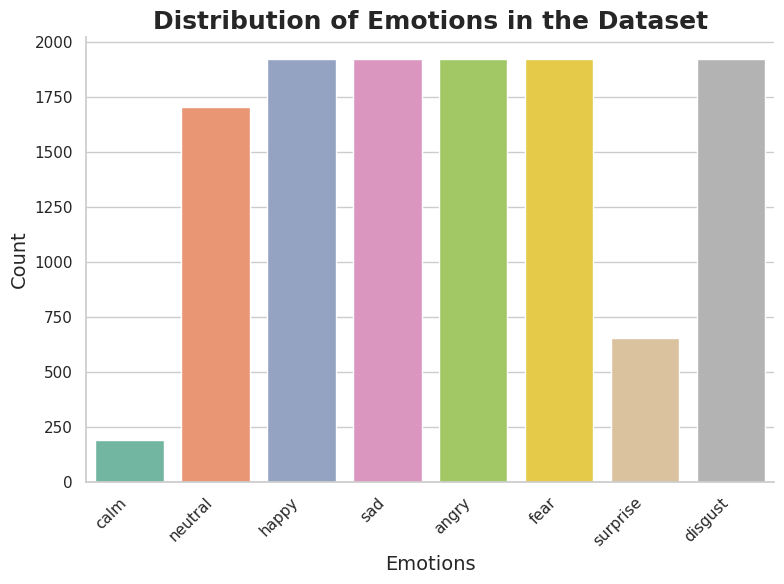

In [ ]:
sns.set(style="whitegrid")

# Configurar el gráfico
plt.figure(figsize=(8, 6))  # Aumenta el tamaño de la figura para que sea más legible

# Gráfico de barras
sns.countplot(x='Emotions', data=data_path, palette='Set2')  # 'Set2' es una paleta agradable

# Título y etiquetas con mayor tamaño y fuente
plt.title('Distribution of Emotions in the Dataset', fontsize=18, fontweight='bold')
plt.xlabel('Emotions', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Ajustar los ejes
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mejor legibilidad
sns.despine(top=True, right=True, left=False, bottom=False)

# Mostrar el gráfico
plt.tight_layout()  # Asegura que los elementos no se solapen
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

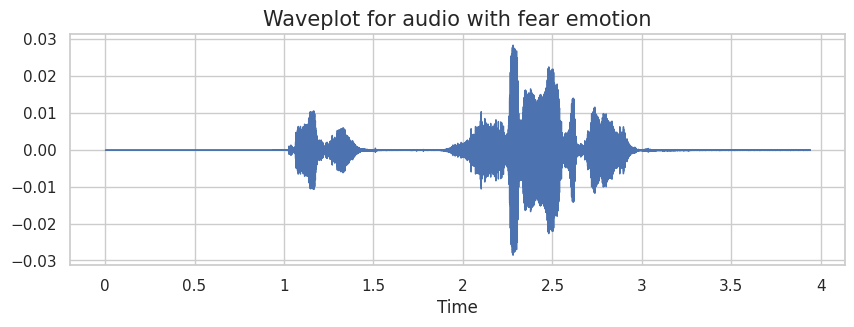

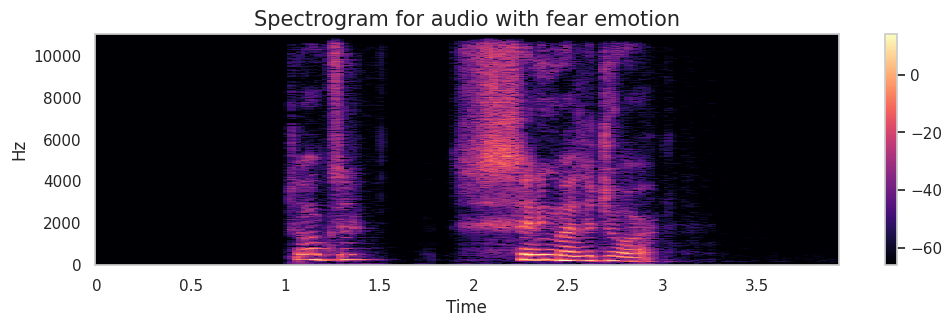

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

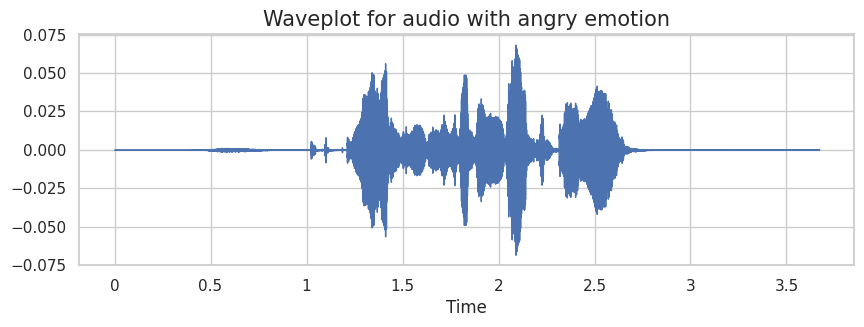

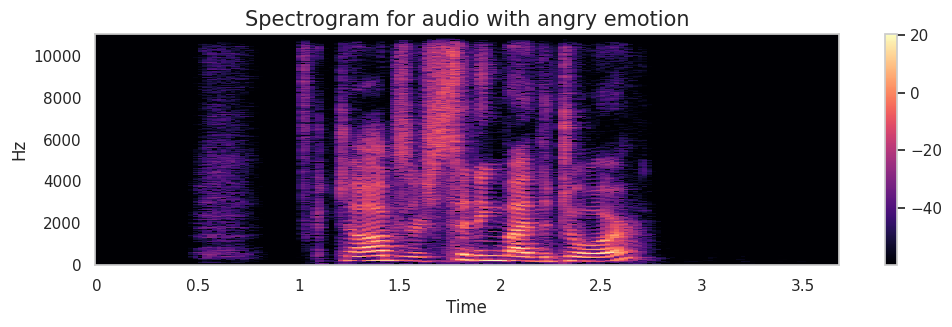

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

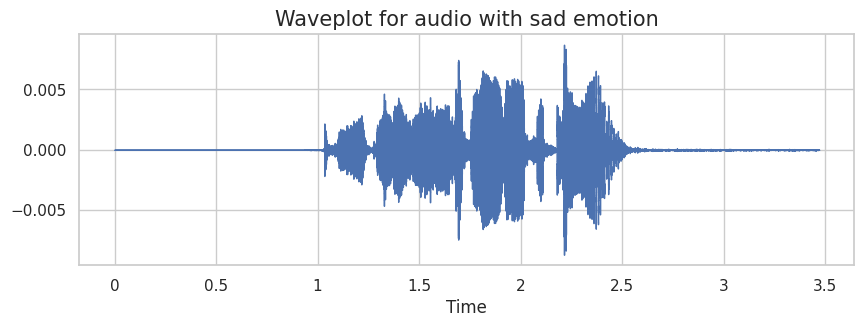

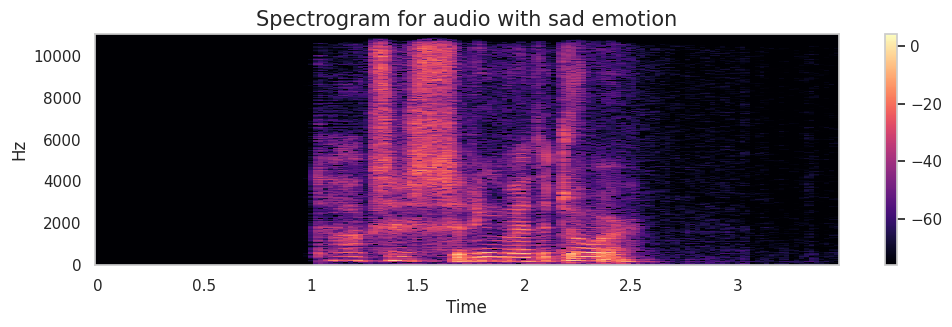

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

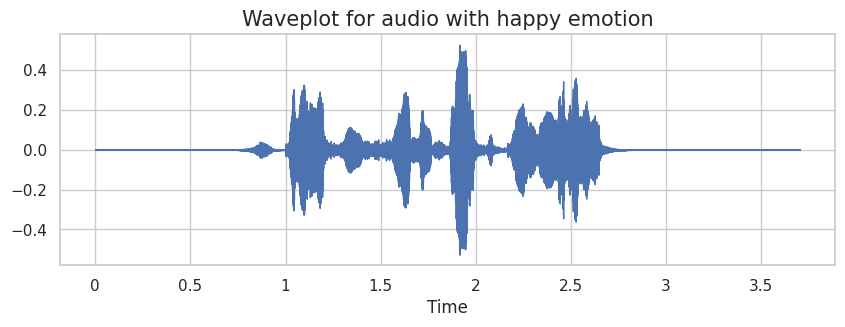

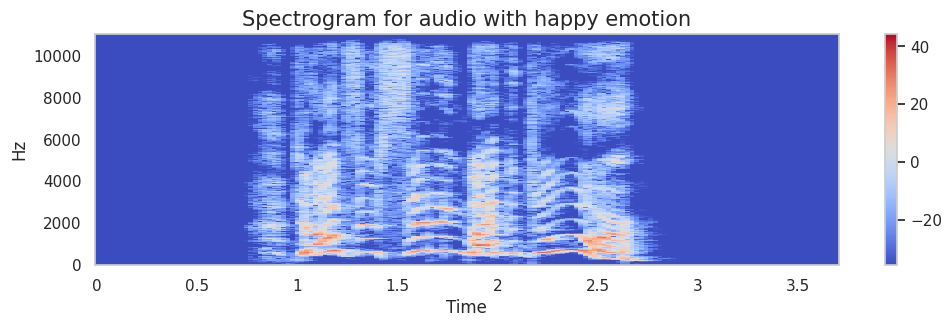

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
# Función para agregar ruido
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)  # Amplificación del ruido
    data = data + noise_amp * np.random.normal(size=data.shape[0])  # Agregar ruido gaussiano
    return data

# Función para estirar el tiempo del audio
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

# Función para desplazar el audio
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)  # Desplazamiento aleatorio
    return np.roll(data, shift_range)

# Función para cambiar el pitch del audio
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

# Cargar un archivo de audio de ejemplo
path = np.array(data_path.Path)[1]  # Asegúrate de que 'data_path.Path' contenga la ruta correcta
data, sample_rate = librosa.load(path)

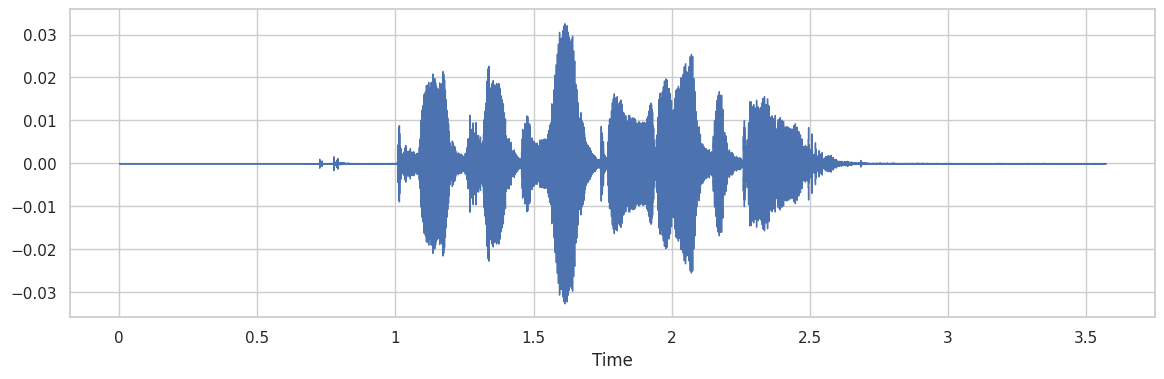

In [ ]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(data, sr=sample_rate)  # Actualizado a waveshow
plt.show()
Audio(path)

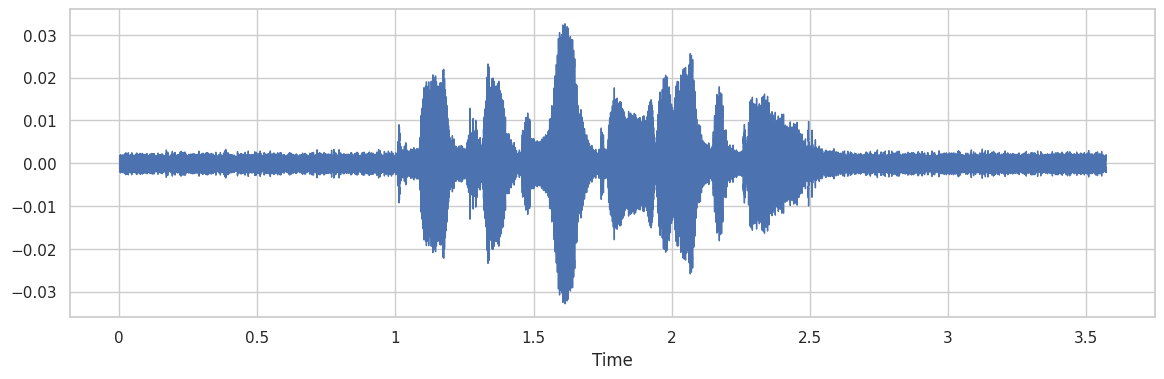

In [ ]:
x = noise(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(x, sr=sample_rate)  # Actualizado a waveshow
plt.show()
Audio(x, rate=sample_rate)

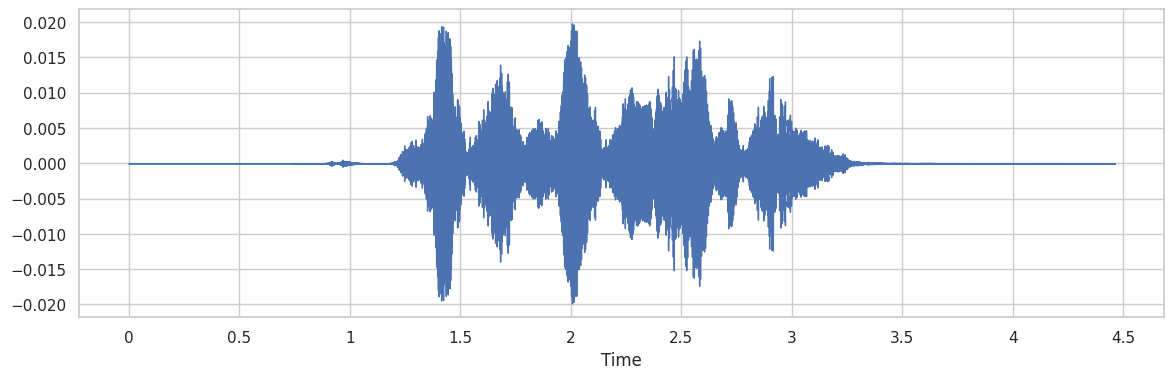

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(x, sr=sample_rate)
Audio(x, rate=sample_rate)

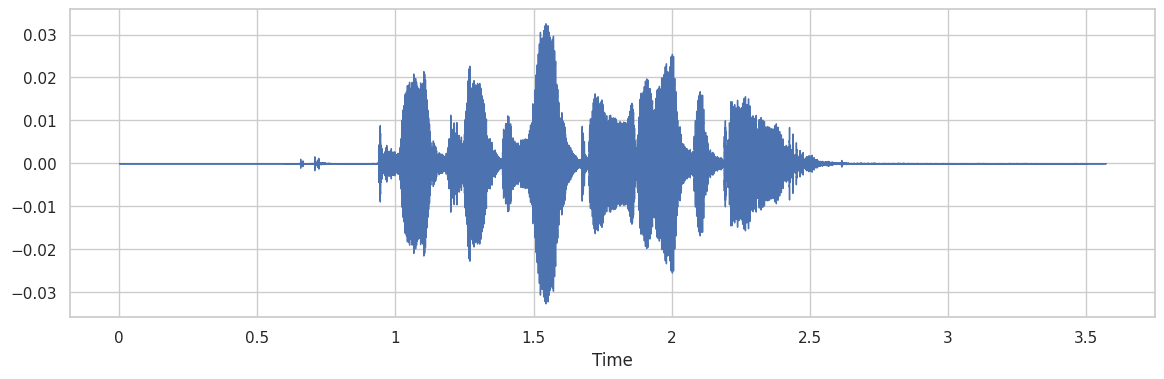

In [ ]:
x = shift(data)  # Aplica el desplazamiento a los datos de audio

# Visualiza el audio desplazado
plt.figure(figsize=(14, 4))
librosa.display.waveshow(x, sr=sample_rate)  # Usar 'waveshow' en lugar de 'waveplot'
plt.show()

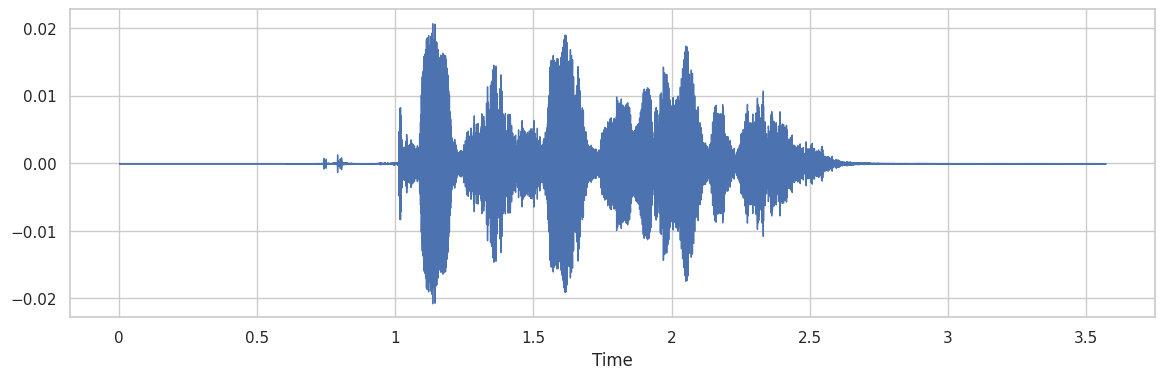

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    try:
      feature = get_features(path)
      for ele in feature:
          X.append(ele)
          # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
          Y.append(emotion)
    except:
      print(path)

<ipython-input-64-6f671650d433>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Crema/AudioWAV1066_TIE_ANG_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TAI_DIS_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TIE_SAD_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TAI_FEA_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TAI_SAD_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TIE_DIS_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_IWW_SAD_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TAI_ANG_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_MTI_DIS_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_MTI_ANG_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TIE_NEU_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_MTI_HAP_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TAI_HAP_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TAI_NEU_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TIE_HAP_XX.wav
/content/drive/MyDrive/Crema/AudioWAV1066_TIE_FEA_XX.wav
/content/drive/MyDrive/Crema/AudioWAV

In [ ]:
len(X), len(Y), data_path.Path.shape


(12720, 12720, (12162,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.254942  0.493397  0.504095  0.569680  0.542490  0.533070  0.509554   
1  0.264879  0.584609  0.601234  0.670952  0.640749  0.640924  0.603961   
2  0.183272  0.554729  0.513188  0.575617  0.602316  0.506177  0.515975   
3  0.282647  0.640147  0.578027  0.598746  0.604783  0.630139  0.608984   
4  0.309715  0.728029  0.682037  0.689570  0.687934  0.719617  0.715759   

          7         8         9  ...       153           154       155  \
0  0.583630  0.692914  0.651138  ...  0.000007  8.960754e-06  0.000004   
1  0.636611  0.751935  0.728399  ...  0.000008  9.656639e-06  0.000005   
2  0.551529  0.663575  0.712542  ...  0.000001  9.259393e-07  0.000003   
3  0.574480  0.584435  0.560920  ...  0.000035  4.319520e-05  0.000043   
4  0.627061  0.632997  0.618626  ...  0.000099  1.011622e-04  0.000105   

        156       157       158       159           160           161   labels  
0  0.000005  0.000006  0.000005  0.000007  5.709127e-06  2.892691e-07     calm  
1  0.000006  0.000007  0.000006  0.000007  6.542404e-06  1.135469e-06     calm  
2  0.000001  0.000001  0.000001  0.000001  7.130867e-07  6.740390e-08     calm  
3  0.000034  0.000048  0.000053  0.000070  4.885273e-05  5.253100e-06  neutral  
4  0.000094  0.000117  0.000120  0.000133  1.160427e-04  7.037218e-05  neutral  

[5 rows x 163 columns]

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9540, 162), (9540, 8), (3180, 162), (3180, 8))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9540, 162), (9540, 8), (3180, 162), (3180, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9540, 162, 1), (9540, 8), (3180, 162, 1), (3180, 8))

## **Modelado**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 162, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 81, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 81, 256)             │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 41, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 41, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 21, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau # Import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=75, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 429ms/step - accuracy: 0.2122 - loss: 1.9200 - val_accuracy: 0.5248 - val_loss: 1.3236 - learning_rate: 0.0010
Epoch 2/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 91s 492ms/step - accuracy: 0.5041 - loss: 1.3416 - val_accuracy: 0.6572 - val_loss: 0.9899 - learning_rate: 0.0010
Epoch 3/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 71s 420ms/step - accuracy: 0.5847 - loss: 1.0955 - val_accuracy: 0.6931 - val_loss: 0.8737 - learning_rate: 0.0010
Epoch 4/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 84s 434ms/step - accuracy: 0.6400 - loss: 0.9620 - val_accuracy: 0.7022 - val_loss: 0.8824 - learning_rate: 0.0010
Epoch 5/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 437ms/step - accuracy: 0.6520 - loss: 0.9207 - val_accuracy: 0.7230 - val_loss: 0.7491 - learning_rate: 0.0010
Epoch 6/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 82s 437ms/step - accuracy: 0.6826 - loss: 0.8450 - val_accuracy: 0.7286 - val_loss: 0.7227 - learning_rate: 0.0010
Epoch 7/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 79s 415ms/step - accuracy: 0.7

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(75)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
!sudo apt-get install portaudio19-dev python3-dev
!pip install pyaudio

In [ ]:

import pyaudio
import wave
import numpy as np
import librosa
from IPython.display import Audio, display

# Función para grabar audio desde el micrófono
def record_audio(filename, duration=3, sample_rate=44100):
    CHUNK = 1024  # Tamaño del buffer
    FORMAT = pyaudio.paFloat32  # Formato de audio (float32 para compatibilidad con librosa)
    CHANNELS = 1  # Mono
    RATE = sample_rate  # Frecuencia de muestreo

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print(f"Grabando {duration} segundos de audio... ¡Habla ahora!")
    frames = []

    for i in range(0, int(RATE / CHUNK * duration)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("¡Grabación finalizada!")

    stream.stop_stream()
    stream.close()
    p.terminate()

    # Guardar el audio en un archivo WAV
    wf = wave.open(filename, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

    return filename




In [ ]:
# Función para preprocesar el audio grabado y extraer características
def preprocess_audio(path, sample_rate=22050):
    # Cargar el audio grabado
    data, sr = librosa.load(path, sr=sample_rate, duration=2.5, offset=0.6)

    # Extraer características como en tu función get_features
    features = extract_features(data)
    features = np.array(features)

    # Escalar las características usando el mismo scaler que usaste para el entrenamiento
    features = scaler.transform(features)

    # Ajustar la forma para que sea compatible con el modelo
    features = np.expand_dims(features, axis=2)

    return features


In [ ]:
# Función para predecir la emoción
def predict_emotion(features):
    # Hacer la predicción con el modelo
    pred = model.predict(features)
    pred_label = encoder.inverse_transform(pred)
    return pred_label[0][0]  # Devolver la emoción predicha

# Grabar y predecir en tiempo real
if __name__ == "__main__":
    # Grabar audio
    audio_file = "recorded_audio.wav"
    record_audio(audio_file, duration=3)  # Graba 3 segundos de audio

    # Reproducir el audio grabado para verificar
    print("Reproduciendo el audio grabado:")
    display(Audio(audio_file))

    # Preprocesar el audio
    features = preprocess_audio(audio_file)

    # Predecir la emoción
    emotion = predict_emotion(features)
    print(f"La emoción detectada en tu voz es: {emotion}")